# Fixed point vs. Floating point

Research Questions 1. Describe the main characteristics of fixed and floating point data representations, and discuss advantages and disadvantages of each in the context of DSP algorithm
implementations. 2. What are the most typical number representation settings in modern DSPs?
Choose two fixed-point and two floating-point cases, and detail number structure, number of bits,
represented range and modes.

## 1 RQ1 <br/>
**Fixed point DSPs:**<br/>
    *Main characteristics*<br/>
        .Represent each number with a minimum of 16 bits (a different length can be used).<br/>
        .Four ways that bit patterns can represent a number:Unsigned integer, signed integer, unsigned fraction and signed fraction.<br/>
    *Advantages*<br/>
        .Cheaper than floating point DSPs<br/>
        .Faster speed of calculations<br/>
    *Disadvantages*<br/>
        .Poor precision compared to floating point DSPs<br/>
        .Lower dynamic range than floating point DSPs<br/>
        .Longer development cycle compared to floating point DSPs<br/>
        .More noise ‘contaminates’ the data when storing it (the gaps between adjacent numbers are much larger; lower signal-to-noise ratio)<br/>
        .Extended precision accumulator neccessary for reducing noise<br/>
        .The possibility of an overflow or underflow needs to be considered after each operation; the programmer must understand dozens of ways to carry out the very basic task of      multiplication.<br/>
**Floating point DSPs:**<br/>
    *Main characteristics*<br/>
        .Represent each number with a minimum of 32 bits (a different length can be used).<br/>
        .The represented numbers are not uniformly spaced.<br/>
    *Advantages*<br/>
        .Better precision than fixed point DSPs <br/>
        .Higher dynamic range than fixed point DSPs<br/>
        .Shorter development cycle than fixed point DSPs<br/>
        .Less noise ‘contaminates’ the data when storing it (smaller gaps between numbers; higher signal-to-noise ratio)<br/>
        .A single command is needed for multiplication, overflow or underflow doesn’t need to be considered<br/>
    *Disadvantages*<br/>
        .More expensive than floating point DSPs<br/>

## 2 RQ2<br/>
There are various types of number representation techniques for digital number representation,mfor example: Binary number system, octal number system, decimal number system, and hexadecimal number system etc. But Binary number system is most relevant and popular for representing numbers in digital computer system.<br/>
fix_64,fix_12,float_32,float_64 2 fixed point cases:<br/>
*fixed point 12 bits:*<br/>
    Number structure: Integer+fraction<br/>
    Number of bits: 1 sign bit + 5 bits to represent the real part + 6 bits to represent the decimal part<br/>
    Represented range: -31.9843575 to 31.9843575 111111.111111 - 011111.111111<br/>
*fixed point 64 bits**:<br/>
    Number structure:Sign+integer+fraction<br/>
    Number of bits:1 sign + 14 bits to represent the real part + 49 bits to represent the decimal part<br/>
    Represented range: -16383.9999999999999982 to 16383.9999999999999982<br/>
        111111111111111.1111111111111111111111111111111111111111111111111 -<br/>
        011111111111111.1111111111111111111111111111111111111111111111111<br/>
*2 floating point cases*
*32 bits (single precision)*
    Number of bits: 1 sign bit, 8 bit exponent, and 23 bit mantissa<br/>
    Number structure: Sign+exponent+mantissa, (sign)x(1+mantissa)x2ˆ(exponent-127)<br/>
    Represented range: 1 11111111 11111111111111111111111 _ 0 11111111<br/>
    11111111111111111111111 = -6.805646932770577e+38 to 6.805646932770577e+38<br/>
    64 bits (double precision)<br/>
    Nuumber of bits: 1 sign bit, 11 bit exponent, and 52 bit mantissa<br/>
    Number structure: Sign+exponent+mantissa, (sign)x(1+mantissa)x2ˆ(exponent-1023)<br/>
    Represented range:1 11111111111 1111111111111111111111111111111111111111111111111111<br/>
    _ 0 11111111111 1111111111111111111111111111111111111111111111111111 = -<br/>
    1.99999999999999982ˆ1024 to 1.99999999999999982ˆ1024


In [1]:
from FixedPoint import FXfamily, FXnum
import numpy as np
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import matplotlib.pyplot as plt

In [2]:
#Generates a random input of 300 samples
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + 0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + 0.1*sin(2*pi*23.45*t+.8)

In [3]:
#------------------------------------------------
# Create a FIR filter (tap weights)
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate. We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps= firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
#[3]

In [4]:
class floating_point_fixed_point(object):
    def __init__(self, representation, taps):
        '''
        allows to specify:
        -fixed or floating point data representation,with their corresponding␣
        ,!bit length
        parameters (representation parameter)
        -an array of filter weights (taps parameter)
        It also converts the tap weights to the chosen data representation␣
        ,!(self.taps)
        '''
        self.representation=representation
        self.taps_arbitrary_precision=taps#I will use these later for the comparison (error plots)
        
        #Here the tap weights are converted to the specified representation
        if (representation=='fix_64'):
            taps_fx64=np.zeros(taps.shape)
            for i in range(len(taps)):
                taps_fx64[i]=FXnum(taps[i], FXfamily(12))
            self.taps=taps_fx64
            print('taps saved for fix_64 representation')
        if (representation=='fix_12'):
            taps_fx12=np.zeros(taps.shape)
            for i in range(len(taps)):
                taps_fx12[i]=FXnum(taps[i], FXfamily(12))
            self.taps=taps_fx12
            print('taps saved for fix_12 representation')
        if (representation=='float_32'):
            self.taps=np.array(taps, dtype=np.float32)
            print('taps saved for float_32 representation')
        if (representation=='float_64'):
            self.taps=np.array(taps, dtype=np.float64)
            print('taps saved for float_64 representation')
            
    def fir_filter(self, x):
        '''
        takes as input an arbitrary long array of samples (x, which is
        longer that the array of weights) and outputs the result of applying␣
        ,!the FIR filter to it (self.filtered_x)
        '''
        #here I apply the fix or float convertions to the array_samples
        self.x_arbitrary_precision=x
        if (self.representation=='fix_64'):
            x_fx64=np.zeros(x.shape)
            for i in range(len(x)):
                x_fx64[i]=FXnum(x[i], FXfamily(12))
            self.x=x_fx64
            print('samples saved for fix_64 representation')
        if (self.representation=='fix_12'):
            x_fx12=np.zeros(x.shape)
            for i in range(len(x)):
                x_fx12[i]=FXnum(x[i], FXfamily(12))
            self.x=x_fx12
            print('samples saved for fix_12 representation')
        if (self.representation=='float_32'):
            self.x=np.array(x, dtype=np.float32)
            print('samples saved for float_32 representation')
        if (self.representation=='float_64'):
            self.x=np.array(x, dtype=np.float64)
            print('samples saved for float_64 representation')
        #Use lfilter to filter x with the FIR filter.
        filtered_x = lfilter(self.taps, 1.0, self.x)
        self.filtered_x=filtered_x
    def arbitrary_precision(self):
        '''
        3.For the created FIR filter, generates an array showing the relative error of each output
        sample when compared to the arbitrary precision case.
        4.Using the data from the previous step,
        generates an error plot using matplotlib.
        '''
        #fir filter for raw input (x and taps without data representation specification)
        filtered_x_arbitrary_precision = lfilter(self.taps_arbitrary_precision,1.0, self.x_arbitrary_precision)
        self.filtered_x_arbitrary_precision=filtered_x_arbitrary_precision
        #relative error array calculation
        ER=np.zeros(self.filtered_x.shape)
        for i in range(len(ER)):
            ER[i]=abs(1 - (self.filtered_x[i]/self.filtered_x_arbitrary_precision[i]))#formula for relative error ER = | 1 - (Vapprox / V) |
        self.ER=ER
        #Difference between both results
        ER2=np.zeros(self.filtered_x.shape)
        for i in range(len(ER2)):
            ER2[i]=abs(self.filtered_x[i]-self.filtered_x_arbitrary_precision[i])#formula for absolute differece between both results
        self.ER2=ER2
        #Error plots
        fig = plt.figure(figsize=(7,4))
        plt.plot(self.ER,linewidth=2, markersize=12)
        plt.title('Relative error ER = | 1 - (Vapprox / V) |')
        plt.show
        
        fig = plt.figure(figsize=(7,4))
        plt.plot(self.ER2,linewidth=2, markersize=12)
        plt.title('Absolute error EA = | V - Vapprox |')
        plt.show

In [5]:
fix_12=floating_point_fixed_point('fix_12',taps)

taps saved for fix_12 representation


In [6]:
fix_12.fir_filter(x)

samples saved for fix_12 representation


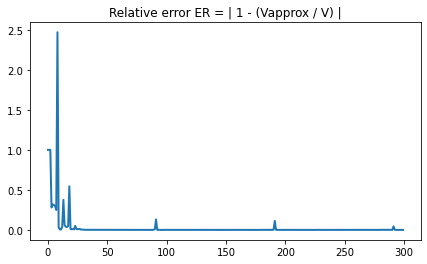

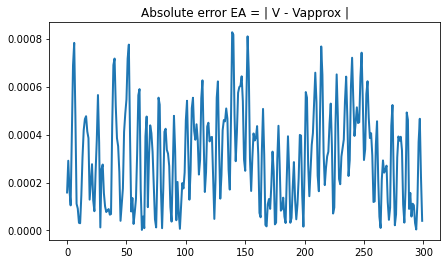

In [7]:
fix_12.arbitrary_precision()

In [8]:
fix_64=floating_point_fixed_point('fix_64',taps)

taps saved for fix_64 representation


In [9]:
fix_64.fir_filter(x)

samples saved for fix_64 representation


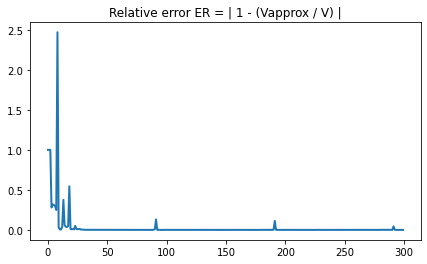

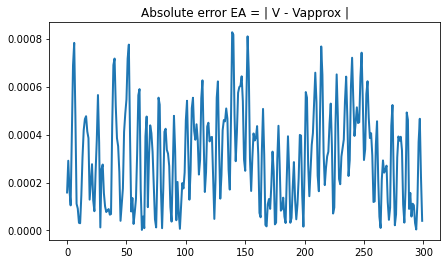

In [10]:
fix_64.arbitrary_precision()

Results are similar for both fixed point representations

In [11]:
float_32=floating_point_fixed_point('float_32',taps)

taps saved for float_32 representation


In [12]:
float_32.fir_filter(x)

samples saved for float_32 representation


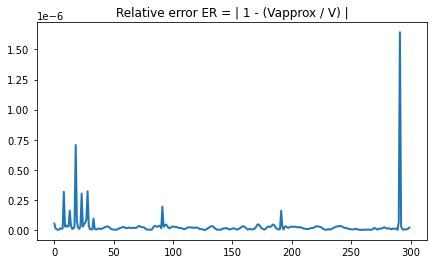

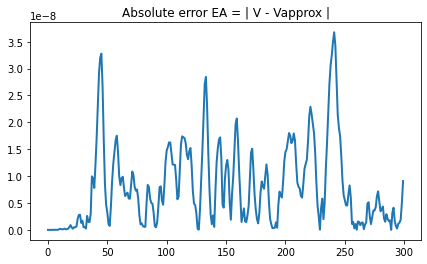

In [13]:
float_32.arbitrary_precision()

Both the absolute and relative errors have drastically disminished using the floating point
representation of 32 bits

In [14]:
float_64=floating_point_fixed_point('float_64',taps)

taps saved for float_64 representation


In [15]:
float_64.fir_filter(x)

samples saved for float_64 representation


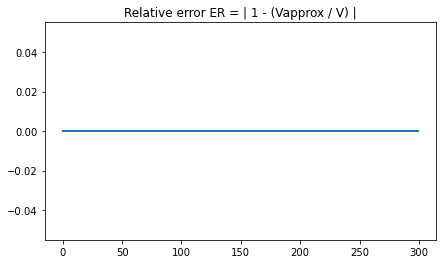

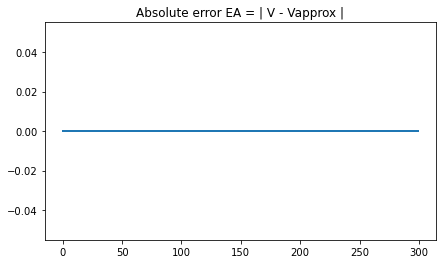

In [16]:
float_64.arbitrary_precision()

Results have significantly improved with floating point representations, reducing the error to
0 with the floating point representation of 64 bits (doble precision)

References [1]http://www.dspguide.com/ch28/4.htm [2]https://www.tutorialspoint.com/fixedpoint-
and-floating-point-number-representations [3]https://github.com/rwpenney/spfpm/blob/spfpm-
1.4/FixedPoint.py [4]https://www.profillic.com/paper/arxiv:1804.05267